In [287]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# numpy基础
数据处理库。核心是多维数组NDarray
底层使用C实现，效率高。

## NDArray
numpy中最重要的类。多维数据包装器

多维数组的创建、修改以及多维数组的属性

### 创建
从数组创建或使用内置函数

In [ ]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.zeros([2, 2, 3], dtype = np.float32)
arr3 = np.ones([2, 2])
print(arr1, type(arr1))
print(arr2)
print(arr3)

### 修改
主要包括维度变换和拼接

In [ ]:
arr1 = np.zeros([1, 1, 4],  dtype=np.int32)
arr2 = np.ones([5, 1, 4], dtype=np.int32)
arr = np.concatenate([arr1, arr2], axis=0)
print('concatenate:', arr)

print('expand1:', np.expand_dims(arr1, 3))
print('expand2', arr2[ :, :, np.newaxis, :])

### 获取数组属性

In [ ]:
arr = np.array([[1, 1, 4, 5, 1, 4], [1, 9, 1, 9, 8, 10]])
print('size:', arr.size)
print('shape:', arr.shape)

### 切片和筛选
切片和python list一致



In [ ]:
arr = np.array([[1, 1, 4, 5, 1], 
                [4, 1, 9, 1, 9],
                [8, 1, 0, 1, 1], 
                [4, 5, 1, 4, 1], 
                [9, 1, 9, 8, 10]])

print('single choose')
print(arr[1])
print(arr[1, 0])
print(arr[[1, 0], [2, 3]])

print('slice')
print(arr[:2, :3])

print('filter')
print(arr>5)
print(arr[arr>7])



### np.where
按条件选择、替换数据

In [ ]:
condition = arr>5
print(np.where(condition, -1, arr))
print(np.where(condition, -1, 2))
rra = -arr
print(np.where(condition, arr, rra))

## 数据保存和加载
```python
numpy.save(file, arr, allow_pickle=True, fix_imports=True)
```
- file：要保存的文件，扩展名为 .npy，如果文件路径末尾没有扩展名 .npy，该扩展名会被自动加上。
- arr: 要保存的数组

```python
numpy.savez(file, *args, **kwds)
```
- file：要保存的文件，扩展名为 .npz，如果文件路径末尾没有扩展名 .npz，该扩展名会被自动加上。
- args: 要保存的数组，可以使用关键字参数为数组起一个名字，非关键字参数传递的数组会自动起名为 arr_0, arr_1, …　。
- kwds: 要保存的数组使用关键字名称。

In [ ]:
# 保存
a = np.array([1, 1, 4, 5, 1, 4])
b = np.array([[1, 9, 1], [9, 8, 10]])

np.save("result/a", a)
np.savez("result/ab", a=a, b=b)

In [ ]:
# 加载
a = np.load('result/a.npy')
ab = np.load('result/ab.npz')

print(a)
print(ab)
print(ab['a'])
print(ab['b'])

## Broadcast

## 线性代数

# Matplotlib绘图
以曲线为例
## 基础

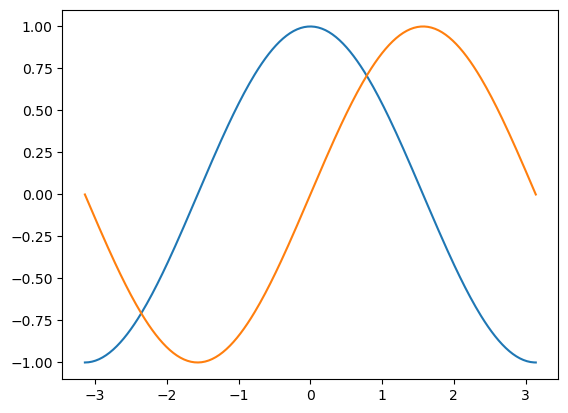

In [23]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

plt.show()

C:\Users\26538\AppData\Local\Temp\ipykernel_41992\425896030.py:5: RuntimeWarning: invalid value encountered in arccos
  C, S, T, A = np.cos(X), np.sin(X), np.arctan(X), np.arccos(X)


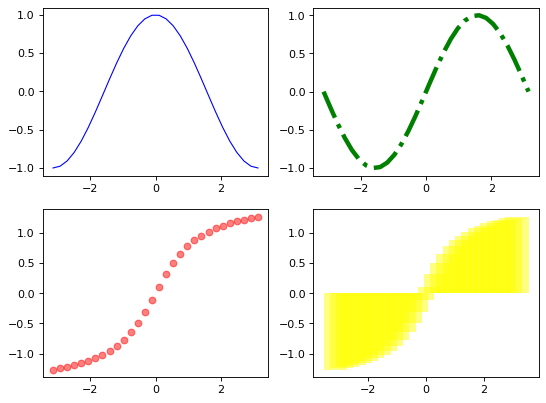

In [39]:
plt.figure(figsize=(8, 6), dpi=80)


X = np.linspace(-np.pi, np.pi, 30, endpoint=True)
C, S, T, A = np.cos(X), np.sin(X), np.arctan(X), np.arccos(X)

plt.subplot(2, 2, 1)
# 绘制余弦曲线，使用蓝色的、连续的、宽度为 1 （像素）的线条
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

plt.subplot(2, 2, 2)
# 绘制正弦曲线，使用绿色的、连续的、宽度为 1 （像素）的线条
plt.plot(X, S, color="green", linewidth=4.0, linestyle="-.")

plt.subplot(2, 2, 3)
plt.scatter(X, T, color='red', alpha=0.5)

plt.subplot(2, 2, 4)
plt.bar(X, T, color="yellow", alpha=0.5)

# 在屏幕上显示
plt.show()

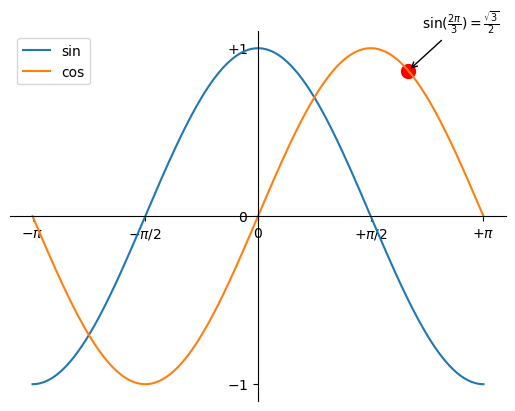

In [78]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, label = 'sin')
plt.plot(X, S, label='cos')

# 修改标签
plt.xticks(
    [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
    [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$+\pi/2$", r"$+\pi$"],
)

plt.yticks([-1, 0, +1], [r"$-1$", r"$0$", r"$+1$"])

# 修改坐标轴位置
ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_position(("data", 0))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("data", 0))

# 显示图例
plt.legend(loc="upper left")

# 标注
t = 2 * np.pi / 3
plt.scatter(
    [
        t,
    ],
    [
        np.sin(t),
    ],
    s=100,
    color="red",
)
plt.annotate(
    r"$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$",
    xy=(t, np.sin(t)),
    xycoords="data",
    xytext=(+10, +30),
    textcoords="offset points",
    arrowprops= dict(arrowstyle = "->"),
)


plt.show()

# Scipy
> an open-source software for mathematics, science, and engineering.
## Document
https://docs.scipy.org/doc/scipy/reference/index.html
## constants

In [79]:
import scipy
print(dir(scipy.constants))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_codata', '_constants', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', '

## optimizer

In [115]:
from math import cos

def eqn(x):
    return x + cos(x)

myroot = scipy.optimize.root_scalar(eqn, method='newton', x0=0.1)

print(myroot)

      converged: True
           flag: converged
 function_calls: 10
     iterations: 5
           root: -0.7390851332151607
         method: newton


C:\Users\26538\AppData\Local\Temp\ipykernel_41992\144516694.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return x + cos(x)


In [120]:
def eqn(x):
    return (x[0]-3)**2 + (x[1]-1)**2

scipy.optimize.minimize(eqn, x0=[0, 0], method='CG')

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 4.9545506515086484e-14
       x: [ 3.000e+00  1.000e+00]
     nit: 1
     jac: [ 4.372e-07  1.557e-07]
    nfev: 9
    njev: 3

## Graph

In [171]:
from scipy.sparse.csgraph import connected_components, dijkstra, floyd_warshall
from scipy.sparse import csr_matrix

arr = np.array([[0, 1, 1], 
                [1, 0, 1111], 
                [2, 1111, 0]])

newarr = csr_matrix(arr)

print(connected_components(newarr))
print(dijkstra(newarr, return_predecessors=True, indices=2))
print(floyd_warshall(newarr, return_predecessors=True))

(1, array([0, 0, 0]))
(array([2., 3., 0.]), array([    2,     0, -9999]))
(array([[0., 1., 1.],
       [1., 0., 2.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]]))


## statistics
### 随机变量相关

连续随机变量对象有下列方法：
- rvs：采样
- pdf：密度函数
- cdf：累积分布函数
- sf：残存函数
- ppf：累积分布的逆
- isf：残存函数的逆
- fit：最大似然估计求参数

离散分布的简单方法大多数与连续分布很类似，但是pdf被更换为密度函数pmf。

In [170]:
# 从常用分布中采样
from scipy import stats
rv = stats.norm(
    loc=0,
    scale=1
)
print(rv.rvs(size=10))
print(rv.pdf(1))

data = stats.norm.rvs(loc=114, scale=514, size=1000000)
print(stats.norm.fit(data))

[-0.49649602  0.0833746  -0.24211993 -0.84522166 -1.40801107 -0.46787846
  0.70715309  1.92440633 -0.75230332 -0.43168702]
0.24197072451914337
(114.16365211815744, 514.1709169376206)


### 假设检验
常用的如下：
- 单样本均值检验
- 两独立样本均值检验
    - 方差相等
    - 方差不相等
    - 检验方差
- 配对样本均值检

In [286]:
from scipy.stats import ttest_ind, ttest_1samp, levene, ttest_rel
import random

v1 = np.random.normal(size=1000)
v2 = np.random.normal(loc=1, size=1000)

# 单总体方差
res = ttest_1samp(v1, 0)
print(res)

# 两独立总体
res = ttest_ind(v1, v2, equal_var=True)
print(res)

# 两总体方差
res = levene(v1, v2)
print(res)

v_pair = [i + random.uniform(-1, 1) for i in v1]
# 配对样本均值
res= ttest_rel(v1, v_pair)
print(res)

TtestResult(statistic=0.6775087663431798, pvalue=0.4982400782355536, df=999)
TtestResult(statistic=-21.49578768830633, pvalue=2.2508229616421437e-92, df=1998.0)
LeveneResult(statistic=0.03461269951858166, pvalue=0.8524284478312666)
TtestResult(statistic=-0.2812848566306392, pvalue=0.7785501738105646, df=999)


# Pytorch
- 拥有类似于NumPy的张量计算系统，能在GPU等硬件上加速
- 自动微分系统的计算图在运行中构建（即动态图系统，区别于tensorflow先定义再建图的静态图系统）

动态图带来的好处在具有复杂控制条件的网络中尤其明显。例如，pytorch可以直接进行如下实现：
```python
def forward(self, x)
    for i in range(5):
        cond = random.randint(1, 5)
        if cond == 1:
            x = self.fc1(x)
        elif cond == 2:
            x = self.fc2(2)
        #.....
    return x
```
而使用tensorflow则需要使用tf.cond()进行多层嵌套


## Pytorch模型训练八股文
```python
class MyDataset(Dataset):
    def __init__(self, *args):
    
    def __getitem__(self, index):

    def __len__(self)

dataset = MyDataset(*args)
dataloader = DataLoader(dataset, *args)

class Model(nn.Modules):
    def __init__(self, *args):
        super().__init__()

    def forward(self, x):
        return output

model = Model(*args)

lossfn = Loss()
optimizer = Optimizer(model.parameters(), lr=LEARNING_RATE)

for epoch_num in range(EPOCH):
    for (data, label) in dataloader:
        output = model(data)
        loss = lossfn(output, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

torch.save(model, MODEL_SAVE_PATH)

```

## Pytorch的模型定义
pytorch中所有神经网络模型都由 torch.nn.Module 派生得到。在实现自己的模型时，绝大多数情况下只需要重写__init__, forward两个方法。

In [ ]:
import torch

class TestModel(torch.nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        # 简写：super().__init__()
        self.layer = torch.nn.Linear(5, 2)

    def forward(self, data):
        return(self.layer(data))




## Pytoch梯度计算与模型优化

In [ ]:
test_model = TestModel()
data = torch.rand((1, 5))
y = test_model(data)

optimizer = torch.optim.SGD(test_model.parameters(), lr=1)
loss_fn = torch.nn.MSELoss()

print("-------------------\nbefore loss backward:\n")
print(test_model.layer._parameters["weight"])
print(test_model.layer._parameters["weight"].grad)

loss = loss_fn(torch.randn((1, 2)), y)
loss.backward()

print("-------------------\nafter loss backward:\n")
print(test_model.layer._parameters["weight"])
print(test_model.layer._parameters["weight"].grad)
print(test_model.layer._parameters["weight"].grad.shape)

print(loss.grad_fn)
print(loss.grad_fn.next_functions)

optimizer.step()

print("-------------------\nafter optimize:")

print(test_model.layer._parameters["weight"])
print(test_model.layer._parameters["weight"].grad)
print(test_model.layer._parameters["weight"].grad.shape)

optimizer.zero_grad()
print("-------------------\nafter zerograd:")

print(test_model.layer._parameters["weight"])
print(test_model.layer._parameters["weight"].grad)


with torch.no_grad():
    loss = loss_fn(torch.randn((1, 2)), y)
    print(loss.grad_fn)

## Pytorch数据集

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from tokenizers import Tokenizer
import json
import threading
from tqdm import tqdm
import math

tokenizer = Tokenizer.from_file("tokenizer/tokenizer.json")
tokenizer.enable_padding(length=256)

def deal_segment(inputlist, savelist):
    for item in inputlist:
        tmp_dict = json.loads(item)
        savelist.append(
            (
                torch.tensor(tokenizer.encode(tmp_dict["content"]).ids[:256]),
                torch.tensor(
                    [1 - tmp_dict["label"], tmp_dict["label"]], dtype=torch.float32
                ),
            )
        )

class MyDataSet(Dataset):
    def __init__(self, file: str):
        self.data = []
        with open(file, "r", encoding='utf-8') as fin:
            inputlist = list(fin)
            tlist = [threading.Thread(target=deal_segment, args = (inputlist[1000*i:1000*(i+1)], self.data,)) for i in range(math.ceil(len(inputlist)/1000))]
            for t in tqdm(tlist):
                t.start()
            for t in tlist:
                t.join()
        fin.close()
                
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return len(self.data)

train_set = MyDataSet(file="dataset/train.jsonl")
test_set = MyDataSet(file="dataset/test.jsonl")

100%|██████████| 20/20 [00:04<00:00,  4.43it/s]


In [19]:
train_loader = DataLoader(dataset=train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=32, shuffle=True)

for data, label in train_loader:
    print(data)
    print(label)
    break

tensor([[  580,   556,   173,  ...,     0,     0,     0],
        [  491,   142, 17053,  ...,     0,     0,     0],
        [  258,   943,   200,  ...,     0,     0,     0],
        ...,
        [   44,   229,   154,  ...,     0,     0,     0],
        [   44,   277,   173,  ...,     0,     0,     0],
        [  258,   292,   156,  ...,     0,     0,     0]])
tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]])


## 训练实例

In [ ]:
import torch
import torch.nn as nn

# 模型定义
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding(num_embeddings=50000, embedding_dim=64)
        self.layer1 = nn.Linear(256*64, 64*128)
        self.ac1 = nn.ReLU()
        self.layer2 = nn.Linear(64*128, 16*16)
        self.ac2 = nn.ReLU()
        self.out = nn.Linear(16*16, 2)
        
    def forward(self, data):
        hidden = self.emb(data).view(-1, 64*256)
        return self.out(self.ac2(self.layer2(self.ac1(self.layer1(hidden)))))
    
    
model = MyModel()

In [ ]:
from torch.optim import SGD
import torch.nn as nn

# 损失函数和优化器定义
loss_fn = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=1e-3)

In [ ]:
import wandb
import numpy as np

# 训练
wandb.finish()
wandb.init(
    # set the wandb project where this run will be logged
    project="summer_guide",
    # track hyperparameters and run metadata
    config={
        "learning_rate": 1e-3,
        "architecture": "MLP",
        "dataset": "amazon-plarity",
        "epochs": 1,
    },
)
model.cuda()
for i in range(20):
    for batch, (X, y) in enumerate(train_loader):
        pred = model(X.cuda())
        loss = loss_fn(pred, y.cuda())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 20 == 0:
            wandb.log(
                {
                    "loss": loss,
                    "acc": np.mean((torch.argmax(pred.cpu(), 1) == torch.argmax(y.cpu(), 1)).numpy()),
                }
            )
    torch.save(model, "result/model.pt")

In [ ]:
torch.save(model, "result/model.pt")

In [ ]:
wandb.finish()

In [ ]:
print(torch.cuda.is_available())